In [670]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from numpy.random import default_rng
from lmfit.models import SineModel
from scipy.optimize import curve_fit
%matplotlib inline

In [671]:
TagTable = {
    'Tag1' : 'E200 420D 49E0 6014 04E6 318A',
    'GTag' : 'E200 470F 45D0 6023 A129 010E'
}

In [672]:
c = 2.998e8 #光の速度
f = 920.4e6 #周波数
wavelength = c / f * 100
print(wavelength)

32.57279443720122


In [673]:
RSSI0 = -63.0

In [674]:
rfiddf=pd.read_csv('results2.csv')
data_size = len(rfiddf)
rfiddf.head()

,Tag ID,RSSI,Phase,Frequency,Antenna No,Created At
0,E200 470F 45D0 6023 A129 010E,-40.5,3.417709,920.4,7,10/24/2022 3:39:30 PM
1,E200 470F 45D0 6023 A129 010E,-40.0,1.908272,920.4,7,10/24/2022 3:39:46 PM
2,E200 470F 45D0 6023 A129 010E,-40.5,0.466330,920.4,7,10/24/2022 3:40:07 PM
3,E200 470F 45D0 6023 A129 010E,-43.0,5.577554,920.4,7,10/24/2022 3:40:22 PM
4,E200 470F 45D0 6023 A129 010E,-45.0,4.319690,920.4,7,10/24/2022 3:40:33 PM


In [675]:
rfiddf.describe()

,RSSI,Phase,Frequency,Antenna No
count,35.000000,35.000000,40.0,40.0
mean,-58.528571,3.239592,920.4,7.0
std,9.296539,1.761861,0.0,0.0
min,-69.500000,0.128854,920.4,7.0
25%,-66.250000,1.889864,920.4,7.0
50%,-62.000000,3.417709,920.4,7.0
75%,-52.250000,4.580467,920.4,7.0
max,-40.000000,6.117515,920.4,7.0


In [676]:
rfiddf.loc[1]

Tag ID        E200 470F 45D0 6023 A129 010E
RSSI                                  -40.0
Phase                              1.908272
Frequency                             920.4
Antenna No                                7
Created At            10/24/2022 3:39:46 PM
Name: 1, dtype: object

In [677]:
columns = ['Distance', 'RSSI', 'Phase']
data = np.empty((0,3))
for i in range(1, int(data_size)+1):
    data = np.append(
        data,
        [[i*5, rfiddf['RSSI'][i-1], rfiddf['Phase'][i-1]]],
        axis=0
    )
    
rfiddf2 = pd.DataFrame(
    columns=columns,
    data=data
)
rfiddf2.head(40)

,Distance,RSSI,Phase
0,5.0,-40.5,3.417709
1,10.0,-40.0,1.908272
2,15.0,-40.5,0.466330
3,20.0,-43.0,5.577554
4,25.0,-45.0,4.319690
5,30.0,-47.0,2.521864
6,35.0,-50.0,0.681087
7,40.0,-53.0,4.540583
8,45.0,-51.5,2.601631
9,50.0,-51.5,1.245592


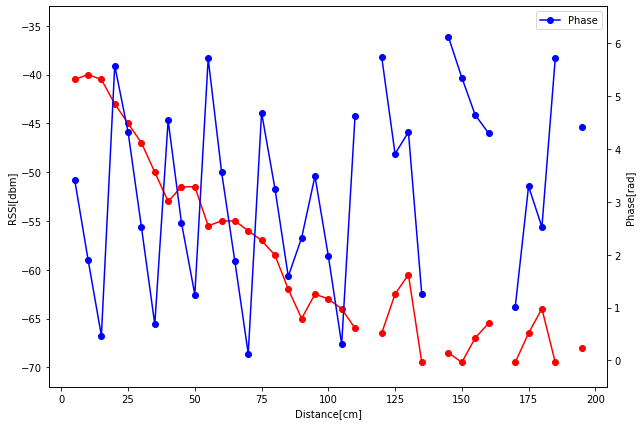

In [678]:
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot()
ax2 = ax1.twinx()
ax1.set_xlabel('Distance[cm]')
ax1.set_ylim(-72,-33)
ax1.set_ylabel('RSSI[dbm]')
ax2.set_ylim(-0.5,6.7)
ax2.set_ylabel('Phase[rad]')
ax1.plot(rfiddf2['Distance'], rfiddf2['RSSI'], label="RSSI", color='red',  marker="o")
ax2.plot(rfiddf2['Distance'], rfiddf2['Phase'], label="Phase", color='blue',  marker='o')
plt.legend()
plt.show()

In [679]:
distance_data = np.empty((0,2))
columns = ['Real_Distance', 'Measured_Distance']
for i in range(0, int(data_size)):
    value = rfiddf2['RSSI'][i]
    distance_data = np.append(
        distance_data,
        [[(i+1)*5, pow(10, (RSSI0 - value)/20) * 100]],
        axis=0
    )
distance = pd.DataFrame(
    data=distance_data,
    columns=columns,
    )

distance.head(15)

,Real_Distance,Measured_Distance
0,5.0,7.498942
1,10.0,7.079458
2,15.0,7.498942
3,20.0,10.000000
4,25.0,12.589254
5,30.0,15.848932
6,35.0,22.387211
7,40.0,31.622777
8,45.0,26.607251
9,50.0,26.607251


best-fit parameters = [  1.101021   -12.32345596]
covariance = 
[[ 8.53702603e-03 -8.02480451e-01]
 [-8.02480451e-01  1.01797939e+02]]


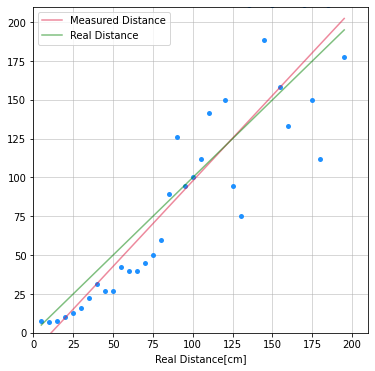

In [680]:
def fit_func_RSSI(x, a, b):
    return a*x + b

distance_format = distance.dropna()

x=distance_format['Real_Distance']
y=distance_format['Measured_Distance']

popt, pcov = curve_fit(fit_func_RSSI, x, y, p0=(1, 0))
print(f"best-fit parameters = {popt}")
print(f"covariance = \n{pcov}")

fig, p = plt.subplots(1, 1, sharex=True, figsize=(6,6))

p.plot(x, y, "o", markersize=5, markerfacecolor="dodgerblue", markeredgewidth=0.0, fillstyle="full")
p.plot(x, fit_func_RSSI(np.array(x), *popt), alpha=0.5, color="crimson", label='Measured Distance')
p.plot(x, x, alpha=0.5, color="green", label='Real Distance')
p.set_xlabel('Real Distance[cm]')
p.set_xlim(0,210)
p.set_ylim(0,210)
p.grid(linewidth=0.5)
p.legend()

In [681]:
Measured_Sin = pd.DataFrame(
    data={
        'Distance' : list(range(1, 201, 5)),
        'phase' : rfiddf2['Phase'],
        'sin(phase)' : np.sin(rfiddf2['Phase']),
        'default_sin' : np.sin((4*np.pi*rfiddf2['Distance']/32.57)%(2*np.pi))
        }
)

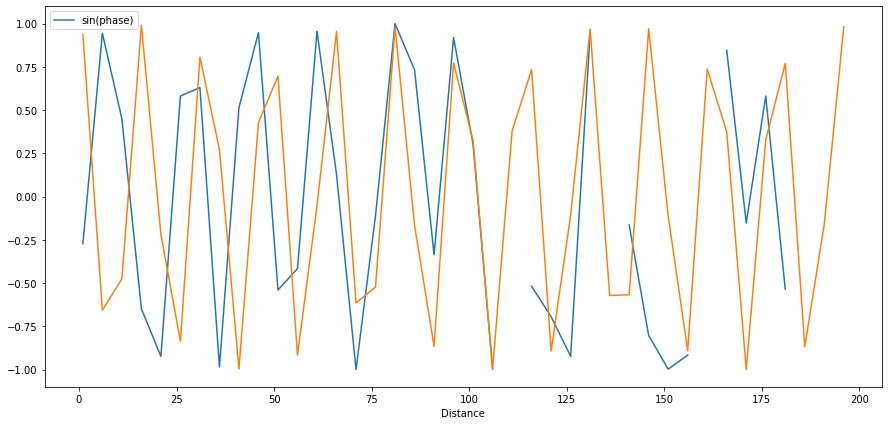

In [682]:
ax = Measured_Sin.plot(x='Distance', y='sin(phase)', figsize=(15,7))
ax.plot(Measured_Sin['Distance'], Measured_Sin['default_sin'])
plt.legend()
plt.show()

best-fit parameters = [30.90339812]
covariance = 
[[0.02993388]]


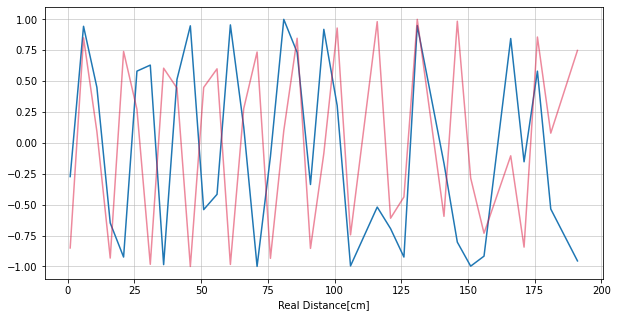

In [683]:
def fit_func_Phase(x, a):
    return np.sin(((4 * np.pi * x) / a + 4.86) % (2 * np.pi))

Measured_Sin_format = Measured_Sin.dropna()

x=Measured_Sin_format['Distance']
y=Measured_Sin_format['sin(phase)']

popt, pcov = curve_fit(fit_func_Phase, x, y, p0=(32.57))
print(f"best-fit parameters = {popt}")
print(f"covariance = \n{pcov}")

fig, p = plt.subplots(1, 1, sharex=True, figsize=(10,5))

p.plot(Measured_Sin_format['Distance'], Measured_Sin_format['sin(phase)'], markersize=5, markerfacecolor="dodgerblue", markeredgewidth=0.0, fillstyle="full", label="Real Sin")
p.plot(x, fit_func_Phase(np.array(x), *popt), alpha=0.5, color="crimson",label="fitted Sin")
p.set_xlabel('Real Distance[cm]')
p.grid(linewidth=0.5)

In [684]:
def getWaveBlockFromRSSI (RSSI, wave_base) :
    if(math.isnan(RSSI)) :
        return math.nan
    else :
        wave_number = math.floor((pow(10, (RSSI0 - RSSI) / 20) * 100 - wave_base) / (wavelength / 2)) 
        return wave_number

def getDistanceFromRSSIPhase (RSSI, Phase, wave_base) :
    if(math.isnan(RSSI)) :
        return math.nan
    else :
        wave_number = getWaveBlockFromRSSI(RSSI, wave_base)
        return (wave_number + 1 - Phase / (2 * np.pi)) * (wavelength / 2) + wave_base

def getWaveBlockFromDistance (realDistance, Phase, wave_base) : 
    if(math.isnan(Phase)) :
        return math.nan
    else :
        wave_number = math.floor((realDistance - wave_base) / (wavelength / 2)) 
        return wave_number

def getDistanceFromPhase (realDistance, Phase, wave_base) : 
    if(math.isnan(Phase)) :
        return math.nan
    else :
        wave_number = getWaveBlockFromDistance(realDistance, Phase, wave_base)
        return (wave_number + 1 - Phase / (2 * np.pi)) * (wavelength / 2) + wave_base

In [685]:
columns = ['Distance', 'RSSI', 'Phase', 'Distance_from_RSSI_Phase', 'Distance_from_Phase', 'Real wave block', 'RSSI wave block']
data = np.empty((0,7))
phase_base = rfiddf['Phase'][0]
wave_base = (1 - phase_base / (2 * np.pi) ) * (wavelength / 2)
for i in range(1, int(data_size)+1):
    RSSIvalue = rfiddf2['RSSI'][i-1]
    Phasevalue = rfiddf2['Phase'][i-1]
    wave_number_from_RSSI = getWaveBlockFromRSSI(RSSIvalue, wave_base) * wavelength / 2 + wave_base
    wave_number_from_real = getWaveBlockFromDistance(i*5, Phasevalue, wave_base) * wavelength / 2  + wave_base
    data = np.append(
        data,
        [[i*5, RSSIvalue, Phasevalue, getDistanceFromRSSIPhase(RSSIvalue, Phasevalue, wave_base), getDistanceFromPhase(i*5, Phasevalue, wave_base), \
            wave_number_from_real , wave_number_from_RSSI]],
        axis=0
    )

new_distance = pd.DataFrame(
    data=data,
    columns=columns,
    )
new_distance.head(20)

,Distance,RSSI,Phase,Distance_from_RSSI_Phase,Distance_from_Phase,Real wave block,RSSI wave block
0,5.0,-40.5,3.417709,14.854976,-1.431422,-8.858909,7.427488
1,10.0,-40.0,1.908272,2.481131,18.767528,7.427488,-8.858909
2,15.0,-40.5,0.466330,22.505129,22.505129,7.427488,7.427488
3,20.0,-43.0,5.577554,9.256527,9.256527,7.427488,7.427488
4,25.0,-45.0,4.319690,12.516987,28.803384,23.713885,7.427488
5,30.0,-47.0,2.521864,17.177060,33.463457,23.713885,7.427488
6,35.0,-50.0,0.681087,21.948465,38.234862,23.713885,7.427488
7,40.0,-53.0,4.540583,28.230815,28.230815,23.713885,23.713885
8,45.0,-51.5,2.601631,33.256696,49.543093,40.000282,23.713885
9,50.0,-51.5,1.245592,36.771631,53.058028,40.000282,23.713885


best-fit parameters = [ 1.07067795 -8.548332  ]
covariance = 
[[ 8.89934266e-03 -8.36538211e-01]
 [-8.36538211e-01  1.06118303e+02]]


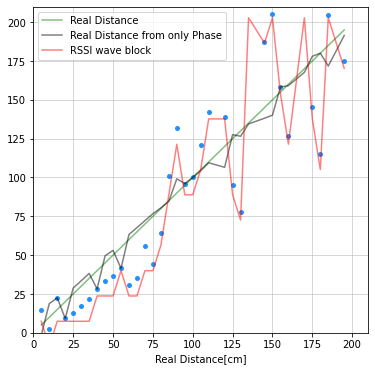

In [686]:
def fit_func_RSSI_Phase(x, a, b):
    return a*x + b

new_distance_format = new_distance.dropna()
x = new_distance_format['Distance']
y = new_distance_format['Distance_from_RSSI_Phase']
z = new_distance_format['Distance_from_Phase']
a = new_distance_format['Real wave block']
b = new_distance_format['RSSI wave block']

popt, pcov = curve_fit(fit_func_RSSI_Phase, x, y, p0=(1, 0))
print(f"best-fit parameters = {popt}")
print(f"covariance = \n{pcov}")

fig, p = plt.subplots(1, 1, sharex=True, figsize=(6,6))

p.plot(x, y, "o", markersize=5, markerfacecolor="dodgerblue", markeredgewidth=0.0, fillstyle="full")
# p.plot(x, fit_func_RSSI_Phase(np.array(x), *popt), alpha=0.5, color="crimson", label='Measured Distance')
p.plot(x, x, alpha=0.5, color="green", label='Real Distance')
p.plot(x, z, alpha=0.5, color="black", label='Real Distance from only Phase')
# p.plot(x, a, alpha=0.5, color="orange", label='Real wave block')
p.plot(x, b, alpha=0.5, color="red", label='RSSI wave block')
p.set_xlabel('Real Distance[cm]')
p.set_xlim(0,210)
p.set_ylim(0,210)
p.grid(linewidth=0.5)
p.legend()